In [ ]:
# Import  needed lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("\nTotal number of rows and columns in the dataset:")
print(df.shape)

In [ ]:
# Read given csv  file
df = pd.read_csv('P587 DATASET.csv')
display(df.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [ ]:
print("\nDataset information :")
df.info()


Dataset information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [ ]:
#Changing datatype of 'Date' column

df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [ ]:

# Check for null values in each column
print("Null values per column:")
print(df.isnull().sum())

# Check for duplicate rows in the entire DataFrame
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Null values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Number of duplicate rows:
0


In [ ]:
print("\nStatistics Summery:")
df.describe()


Statistics Summery:


,Date,Open,High,Low,Close,Adj Close,Volume
count,2011,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,2016-01-01 03:10:28.344107520,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
min,2012-01-03 00:00:00,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,2014-01-02 12:00:00,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,2015-12-31 00:00:00,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,2017-12-28 12:00:00,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,2019-12-30 00:00:00,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08
std,NaN,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07


In [ ]:
# Check the variance of numerical columns
print("Variance of numerical columns:")
print(df.select_dtypes(include=np.number).var())

Variance of numerical columns:
Open         2.548609e+03
High         2.593488e+03
Low          2.512510e+03
Close        2.558171e+03
Adj Close    2.749790e+03
Volume       2.193851e+15
dtype: float64


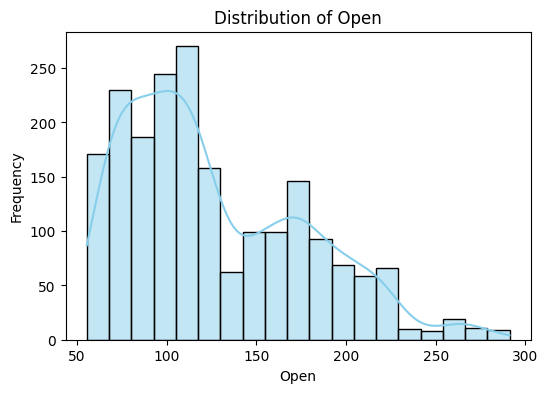

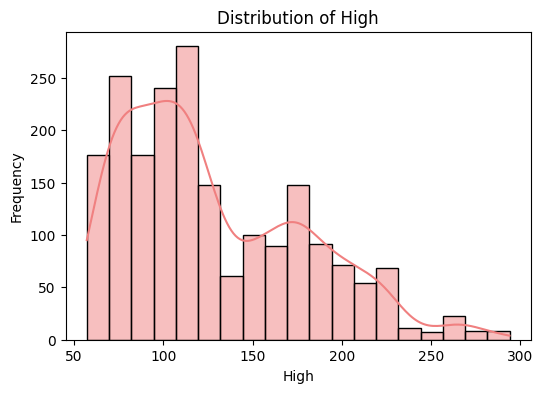

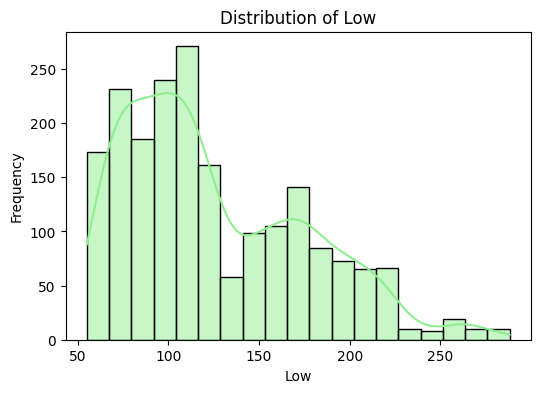

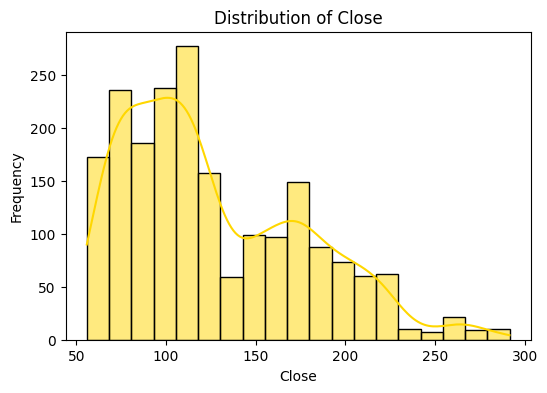

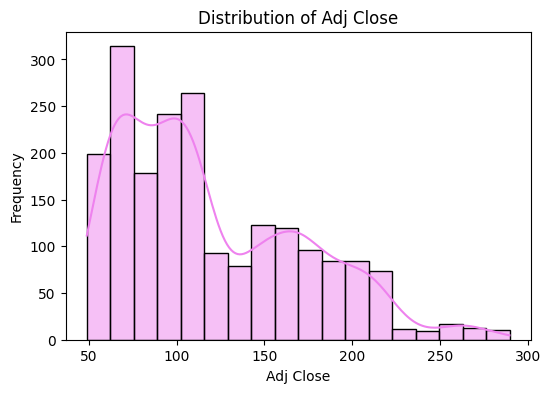

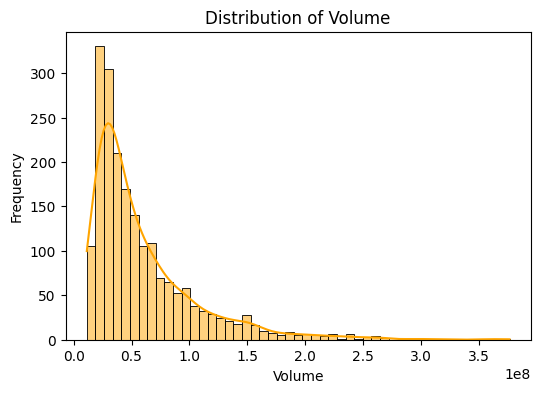

In [ ]:
# Generate histograms for each numerical column

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
different_colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet', 'orange']
for i, col in enumerate(numerical_cols):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True, color=different_colors[i % len(different_colors)])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Histograms  show a distribution of stock price and volume  over the period
# The shape of graph skewed to the right, meaning there are more data points at lower price ranges and fewer at higher price ranges
# The histogram for 'Volume' will show the distribution of the number of shares traded each day
# This distribution is skewed to the right

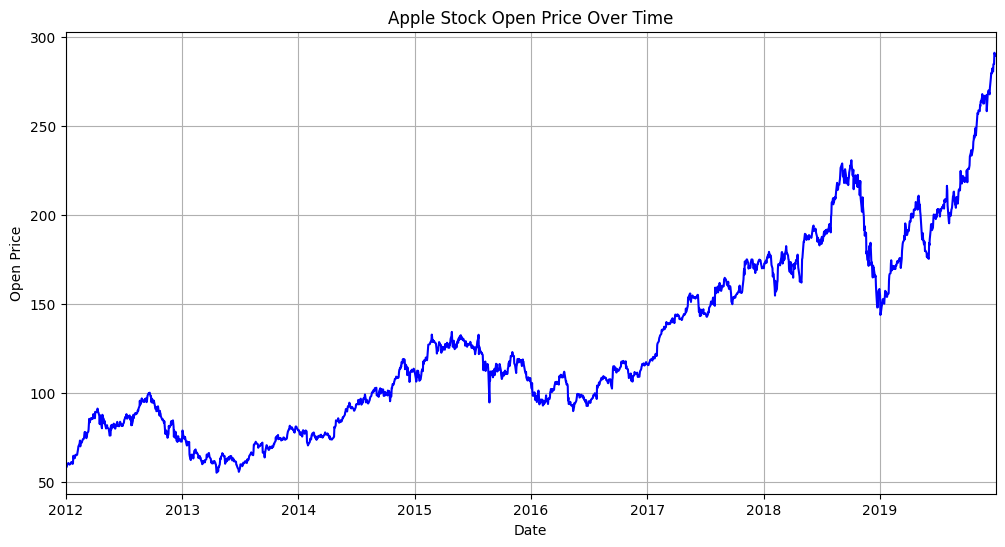

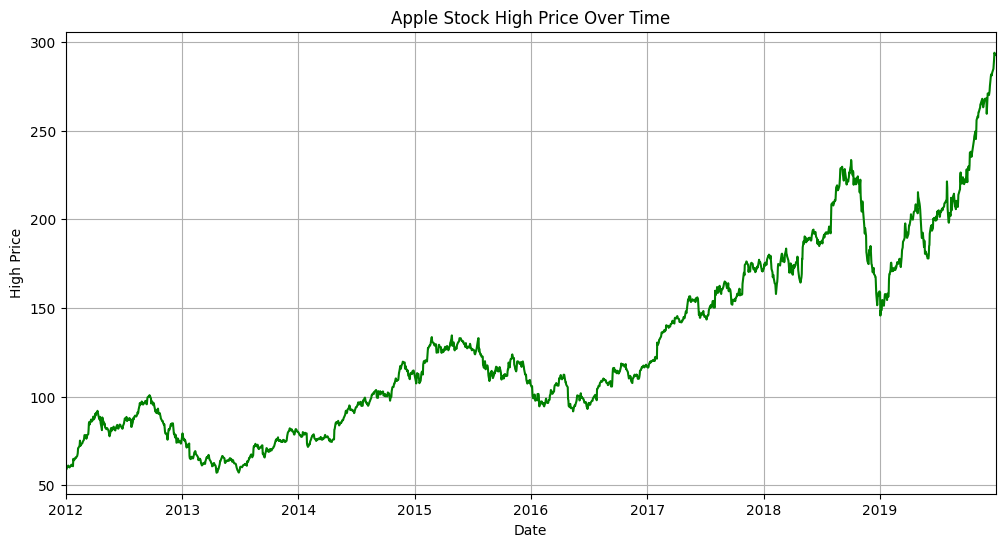

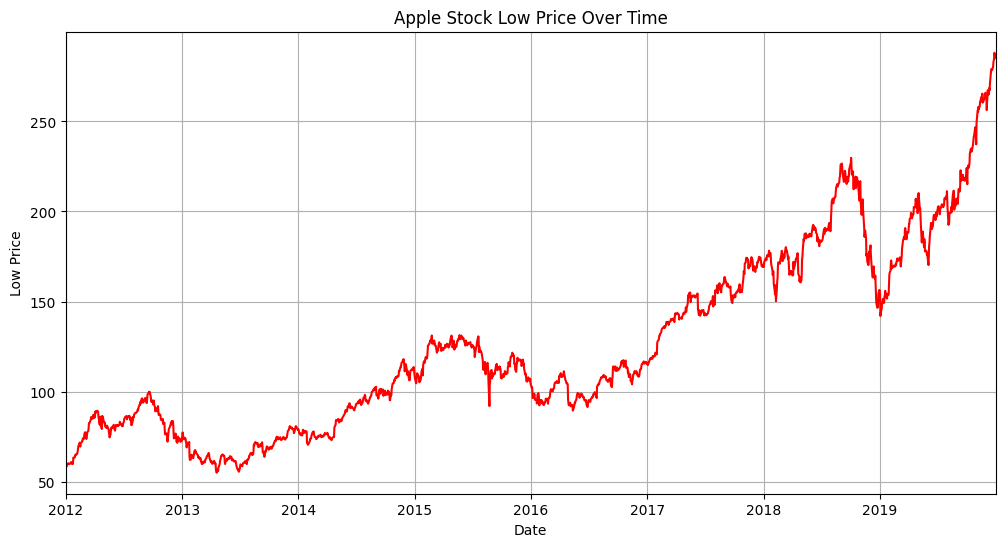

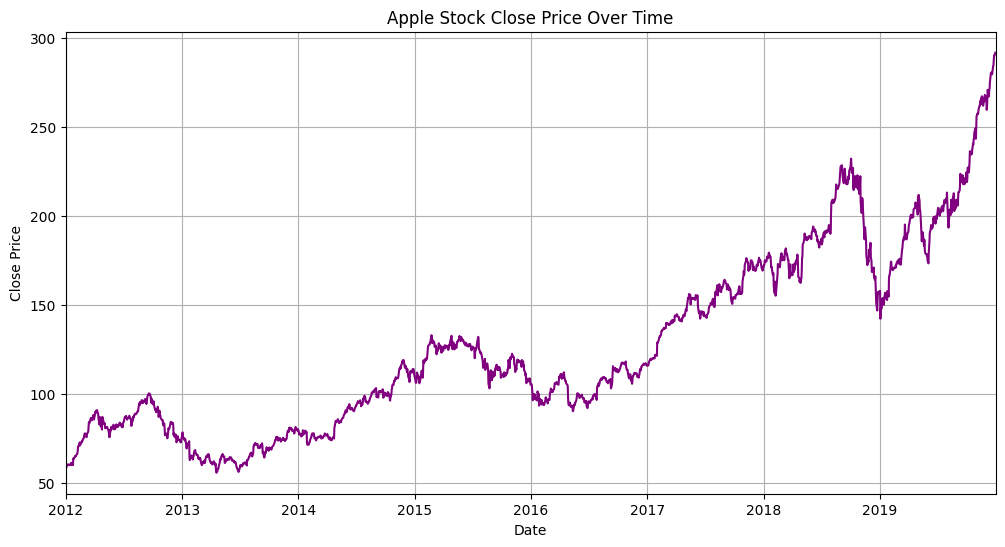

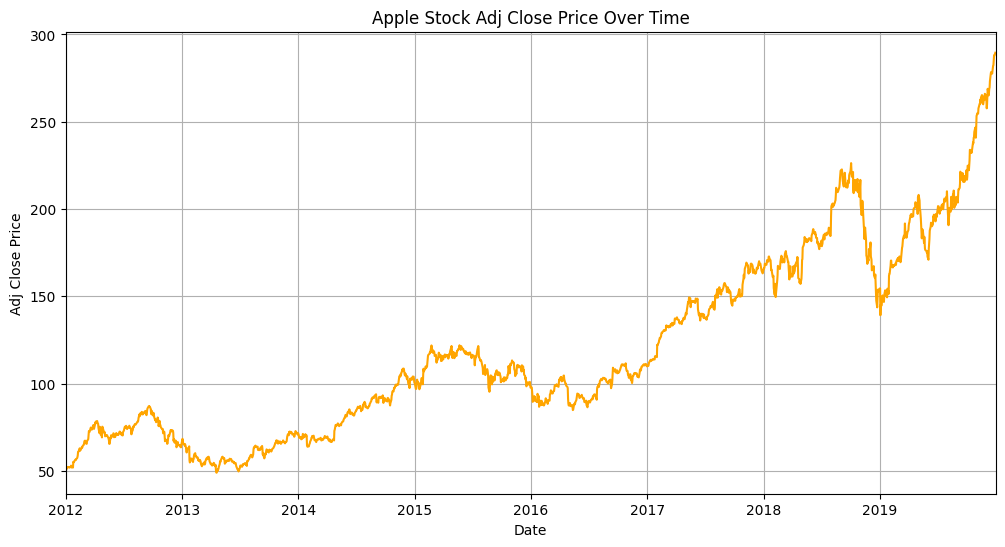

In [ ]:
#Generate line plots of numerical variables
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, col in enumerate(price_columns):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[col], color=colors[i])
    plt.title(f'Apple Stock {col} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'{col} Price')
    plt.grid(True)
    # Set x-axis limits to explicitly show data from 2012-01-01 to 2019-12-31
    plt.xlim(pd.to_datetime('2012-01-01'), pd.to_datetime('2019-12-31'))
    plt.show()

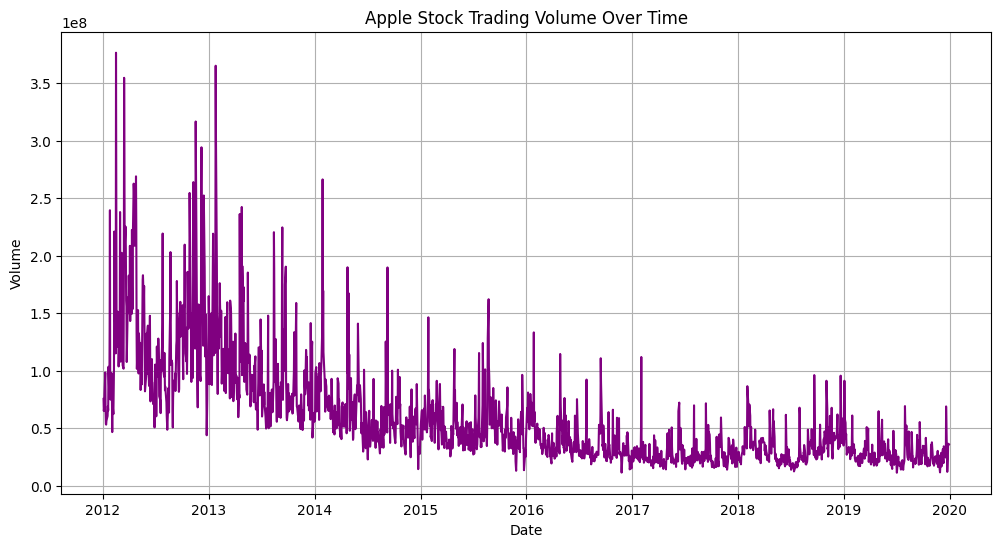

In [ ]:
# Plotting the 'Volume' over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='purple') # Using a different color for volume
plt.title('Apple Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [ ]:
# By looking  line plot of stock price there is upward long term trend
# seasonality is not clearly show in the data
# These ups and downs show that the price isn't always stable ,volatility is definitely present
# Data is  non stationary

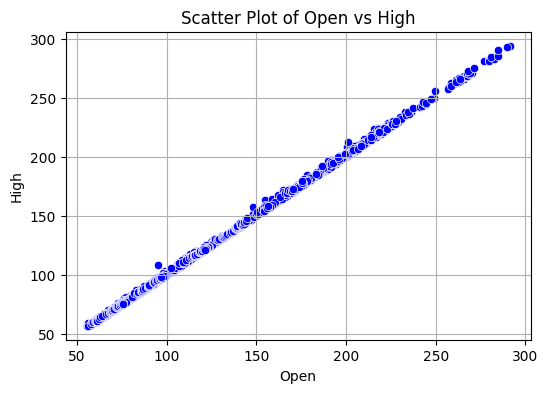

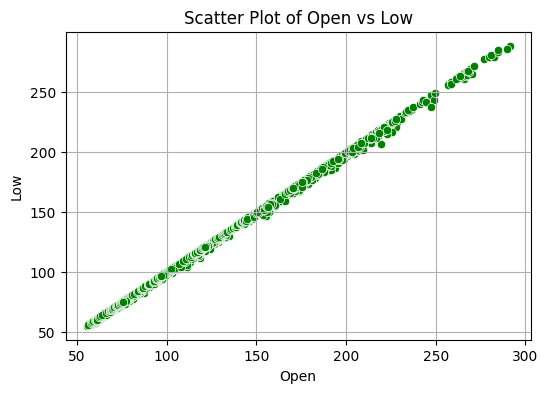

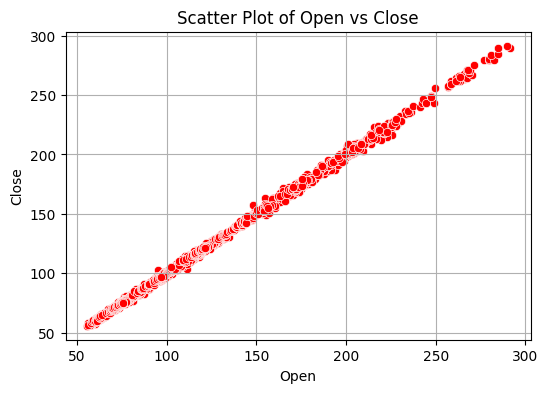

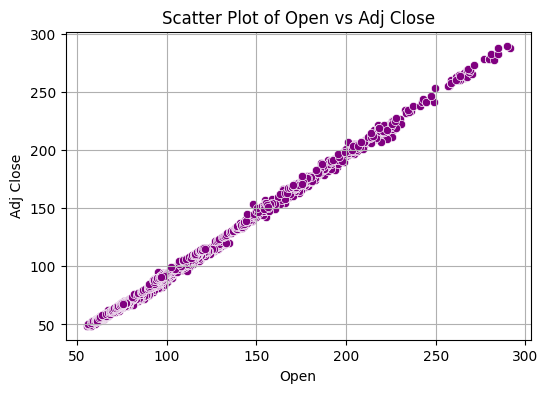

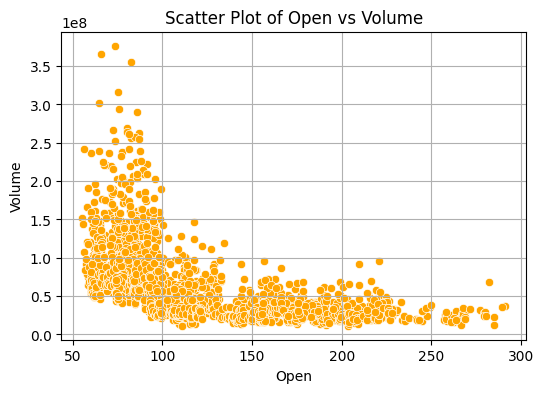

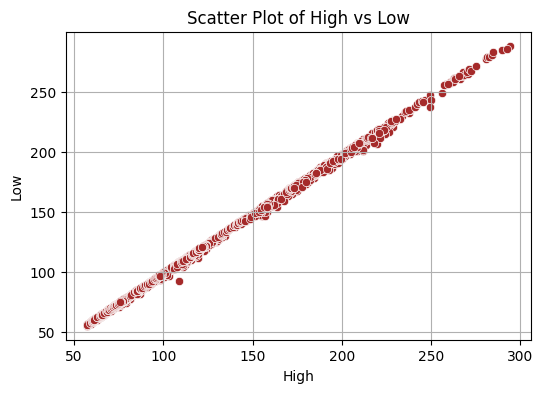

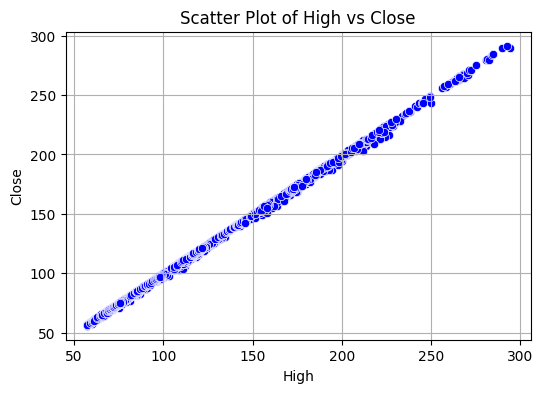

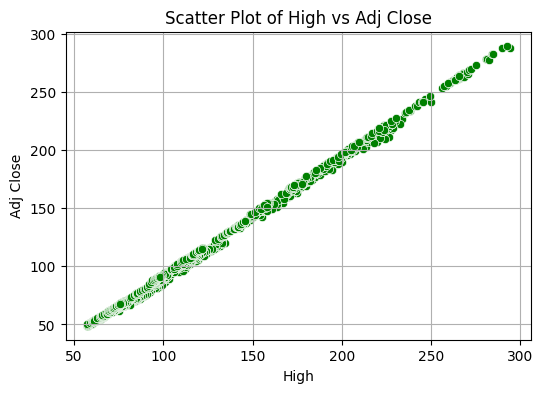

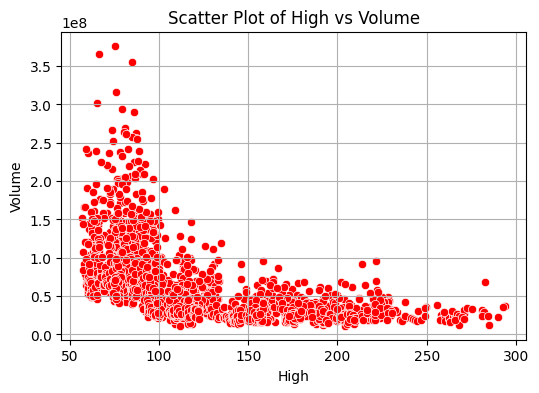

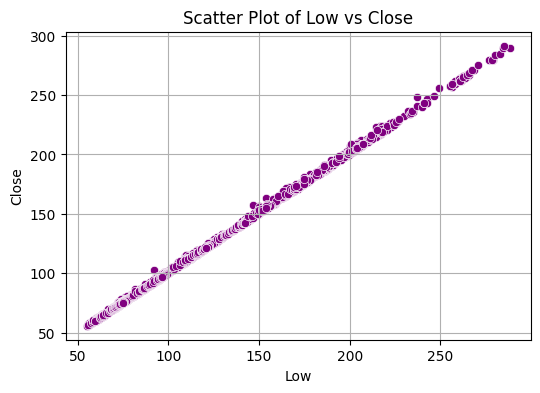

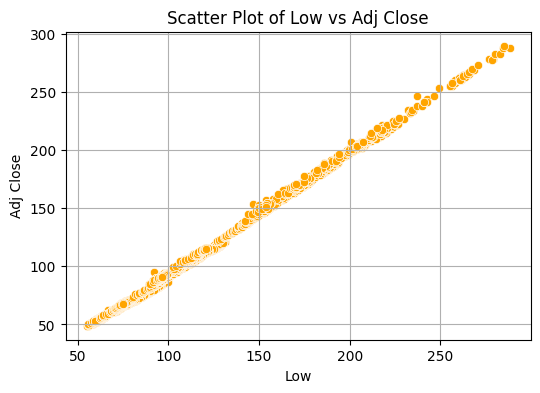

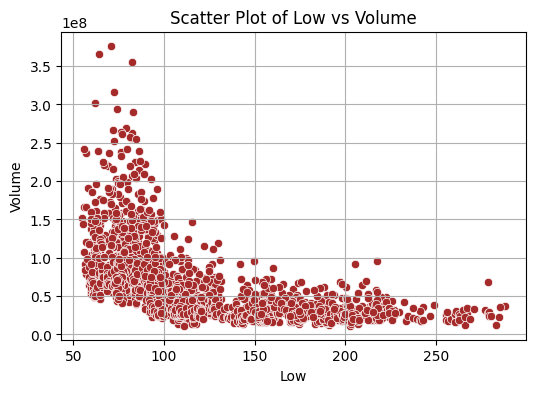

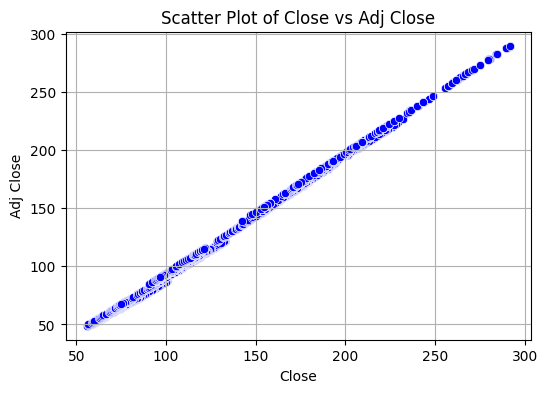

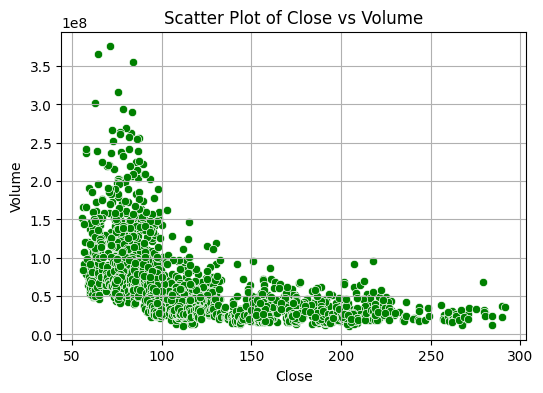

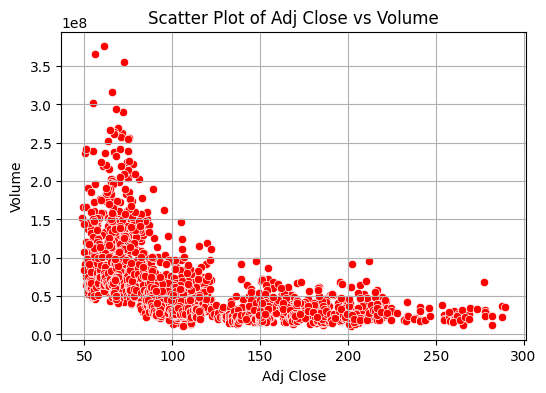

In [ ]:
# Generate scatter plots for different pairs of numerical variables
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
col_pairs = [(numerical_cols[i], numerical_cols[j]) for i in range(len(numerical_cols)) for j in range(i + 1, len(numerical_cols))]

for i, (col1, col2) in enumerate(col_pairs):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col1, y=col2, color=colors[i % len(colors)])
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()

In [ ]:
# Bylookinng scatter plot of Price vs Price (Open, High, Low, Close, Adj Close) it seems like very storng  positive linear relation
# because these values are all closely related to the stock's price on a given day

# The scatter plots of the price variables with Volume will likely show weak relation

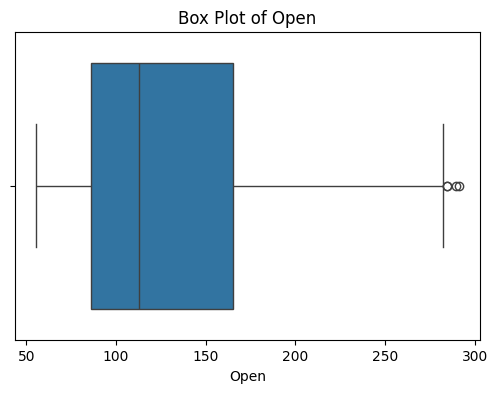

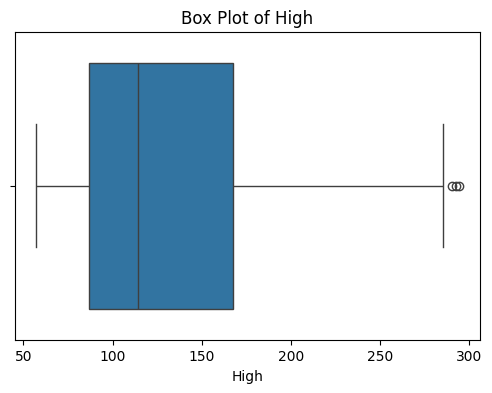

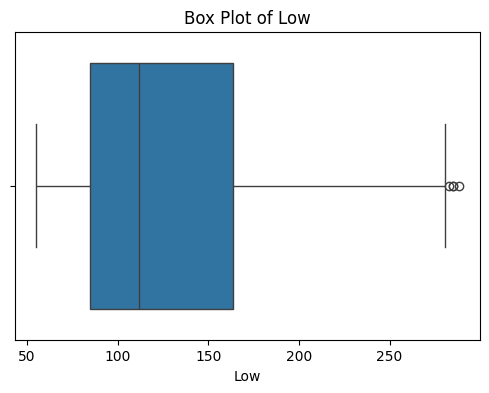

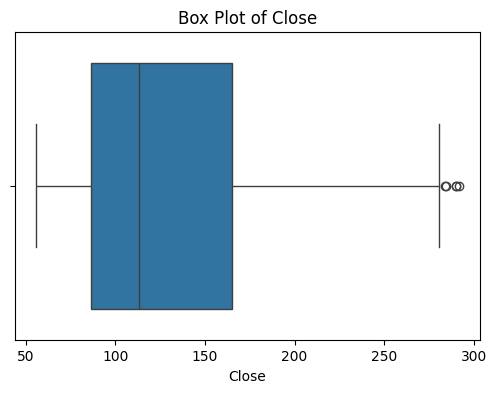

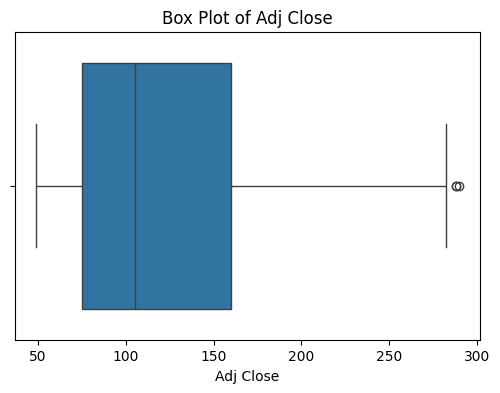

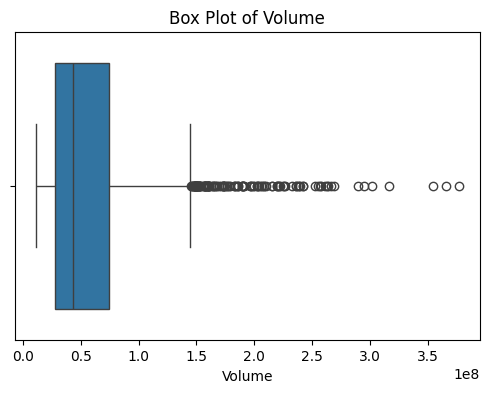

In [ ]:
# Generate Box plot of numerical value

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
#stock prices and volume,they are genuine data points representing significant market activity that should be understood and handled carefully, rather than simply removed.

In [ ]:
#Feature Engineering :

# Moving averages
df['Moving_avg'] = df['Close'].rolling(window=30).mean()

#Volatility measures
df['Volatility'] = df['Close'].rolling(window=30).std()


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_avg,Volatility
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN


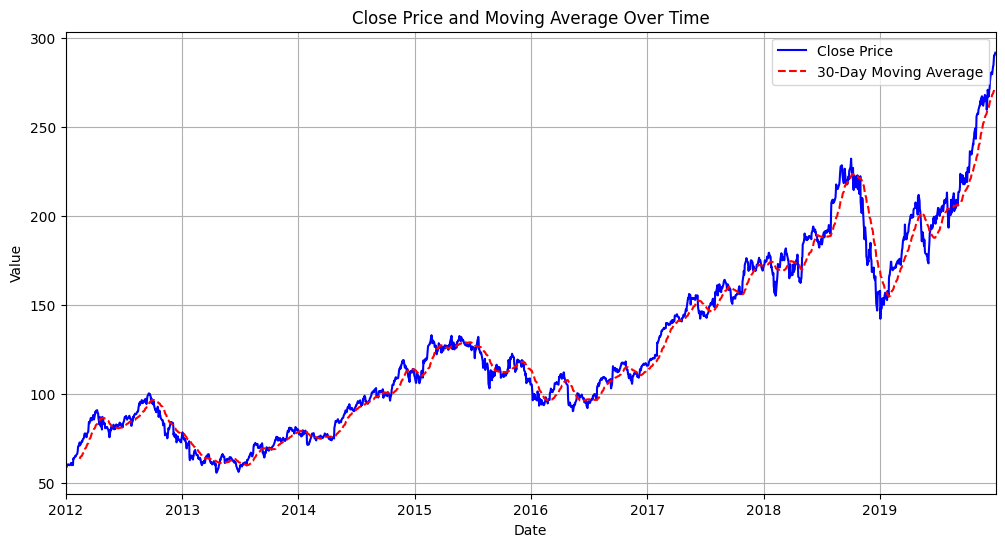

In [ ]:
#Line plot of close price and moving avg

# Plot Close Price
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')

# Plot Moving Average
plt.plot(df['Date'], df['Moving_avg'], label='30-Day Moving Average', color='red', linestyle='--')

plt.title('Close Price and Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
# Set x-axis limits to explicitly show data from 2012-01-01 to 2019-12-31
plt.xlim(pd.to_datetime('2012-01-01'), pd.to_datetime('2019-12-31'))
plt.show()

In [ ]:
# Apply logarithmic transformation only to the 'Close' column

df['Close_log'] = np.log(df['Close'] + 1)

print("DataFrame after Log Transformation on Close Price:")
display(df.head())

DataFrame after Log Transformation on Close Price:


,Date,Open,High,Low,Close,Adj Close,Volume,Moving_avg,Volatility,Close_log
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,4.090121
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,4.095392
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,4.106250
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,4.116479
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,4.114917


In [ ]:
# Log transformations can help to stabilize the variance of features
# make skewed data more normally distributed
# reduce the impact of extreme outliers, make data more easier to model

In [ ]:
print("Shape of the DataFrame after log transformation and feature engineering:")
print(df.shape)

Shape of the DataFrame after log transformation and feature engineering:
(2011, 10)


In [ ]:

# Drop rows with NaN values
df.dropna(inplace=True)

print("\nShape of the DataFrame after removing NaN values:")
print(df.shape)


Shape of the DataFrame after removing NaN values:
(1982, 10)


In [ ]:
# Checking for stationarity of  log-transformed 'Close' price
# Perform Augmented Dickey-Fuller test on the log-transformed 'Close' price


from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Close_log'].dropna())
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))
alpha = 0.05
if adf_test[1] < alpha:
    print("\nThe time series is likely stationary.")
else:
    print("\nThe time series is likely non-stationary.")

ADF Statistic: 0.19250559716101698
p-value: 0.9718381092838089
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568

The time series is likely non-stationary.


In [ ]:
# Apply first-order differencing to the log-transformed Close price to  make it stationary
# This involves subtracting the previous observation from the current observation
df['Close_log_diff'] = df['Close_log'].diff().dropna()

print("DataFrame after first-order differencing:")
display(df.head())

adf_test_diff = adfuller(df['Close_log_diff'].dropna())

print('\nADF Statistic (Differenced):', adf_test_diff[0])
print('p-value (Differenced):', adf_test_diff[1])
print('Critical Values (Differenced):')
for key, value in adf_test_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test_diff[1] < alpha:
    print("\nThe differenced time series is likely stationary.")
else:
    print("\nThe differenced time series is likely non-stationary.")

DataFrame after first-order differencing:


,Date,Open,High,Low,Close,Adj Close,Volume,Moving_avg,Volatility,Close_log,Close_log_diff
29,2012-02-14,72.094284,72.794289,71.714287,72.779999,62.892056,115099600,63.574667,4.048272,4.301088,NaN
30,2012-02-15,73.465714,75.184288,70.984283,71.095711,61.436600,376530000,63.986286,4.166554,4.277995,-0.023093
31,2012-02-16,70.214287,72.127144,69.518570,71.744286,61.997032,236138000,64.409000,4.291253,4.286950,0.008956
32,2012-02-17,71.872856,72.538574,71.471428,71.731430,61.985954,133951300,64.809428,4.397642,4.286774,-0.000177
33,2012-02-21,72.411430,73.550003,72.017143,73.550003,63.557446,151398800,65.249667,4.591865,4.311470,0.024696



ADF Statistic (Differenced): -15.792323593297157
p-value (Differenced): 1.098464766326916e-28
Critical Values (Differenced):
	1%: -3.434
	5%: -2.863
	10%: -2.568

The differenced time series is likely stationary.


<Figure size 1200x600 with 0 Axes>

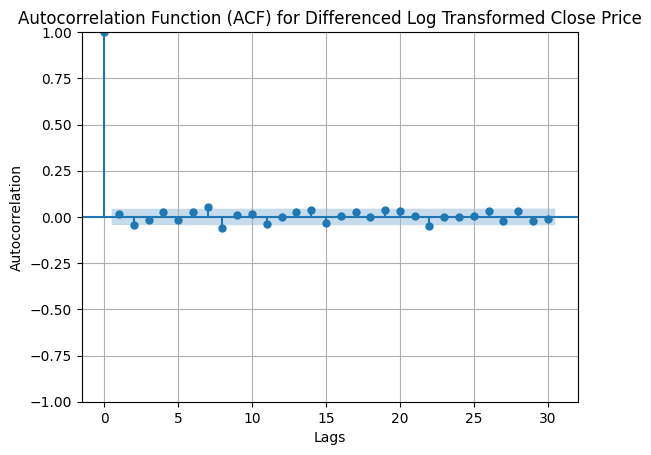

<Figure size 1200x600 with 0 Axes>

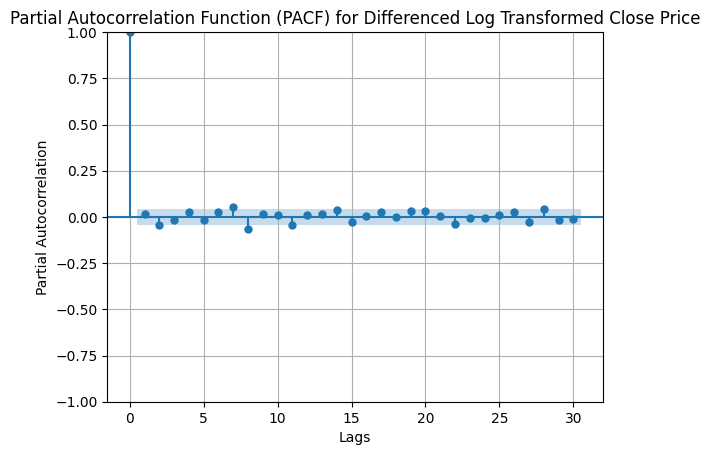

In [ ]:
# Plot ACF and PACF of the differenced series to determine p, d, q order

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Close_log_diff'].dropna(), lags=30)
plt.title('Autocorrelation Function (ACF) for Differenced Log Transformed Close Price')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Close_log_diff'].dropna(), lags=30)
plt.title('Partial Autocorrelation Function (PACF) for Differenced Log Transformed Close Price')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df['Close_log_diff'].iloc[0:train_size], df['Close_log_diff'].iloc[train_size:]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (1585,)
Testing data shape: (397,)


In [ ]:
# Fit an ARIMA model to the differenced close  log-transformed data

from statsmodels.tsa.arima.model import ARIMA

p = 1  #Determine from PACF
d = 1  # Determine from  differenced
q = 1   # Determine from ACF

# Fit the ARIMA model to the training data (the differenced series)
arima_model = ARIMA(train_data.dropna(), order=(p, 0, q))
arima_model_fit = arima_model.fit()



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
#Evalution matrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# The ARIMA model was fitted on the differenced log-transformed data.
# To evaluate on the original scale, we need to inverse transform the test data

# Inverse differencing and log transformation for the test data
last_train_log_price = df['Close_log'].iloc[len(train_data) - 1]
test_data_log = np.cumsum(test_data.dropna()) + last_train_log_price
test_data_original_scale = np.expm1(test_data_log)

# Let's re-fit the model on the full differenced log training data to ensure correct starting point for forecasting test set
arima_model_full_train = ARIMA(df['Close_log_diff'].iloc[0:train_size].dropna(), order=(p, 0, q))
arima_model_full_train_fit = arima_model_full_train.fit()

predictions_diff_log_test = arima_model_full_train_fit.forecast(steps=len(test_data.dropna()))

# Inverse transform the test predictions
predictions_log_test = np.cumsum(predictions_diff_log_test) + df['Close_log'].iloc[train_size - 1]
predictions_original_scale_test = np.expm1(predictions_log_test)

# Let's get the actual test data from the original dataframe for comparison
actual_test_data = df['Close'].iloc[train_size + len(test_data) - len(test_data.dropna()):]


# Evaluate the model
mse_arima = mean_squared_error(actual_test_data, predictions_original_scale_test)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(actual_test_data, predictions_original_scale_test)

print(f"ARIMA Model Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {mse_arima:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_arima:.4f}")
print(f"Mean Absolute Error (MAE): {mae_arima:.4f}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA Model Evaluation on Test Data:
Mean Squared Error (MSE): 757.0363
Root Mean Squared Error (RMSE): 27.5143
Mean Absolute Error (MAE): 23.4880


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# Make predictions by using ARIMA model

# Make predictions on differenced log transformed close price for the next 30 days
predictions_diff_log = arima_model_fit.forecast(steps=30)

# Inverse transform the predictions to the original scale

# First, inverse the differencing
last_train_log_price = df['Close_log'].iloc[len(train_data) -1]
predictions_log = np.cumsum(predictions_diff_log) + last_train_log_price

# Then, inverse the log transformation
predictions_original_scale = np.expm1(predictions_log)

print("\nPredictions on 30 days price scale:")
print(predictions_original_scale.head())
print(predictions_original_scale.tail())


Predictions on 30 days price scale:
1584    190.479745
1585    190.557038
1586    190.683753
1587    190.795554
1588    190.911973
Name: predicted_mean, dtype: float64
1609    193.350372
1610    193.467268
1611    193.584234
1612    193.701271
1613    193.818378
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


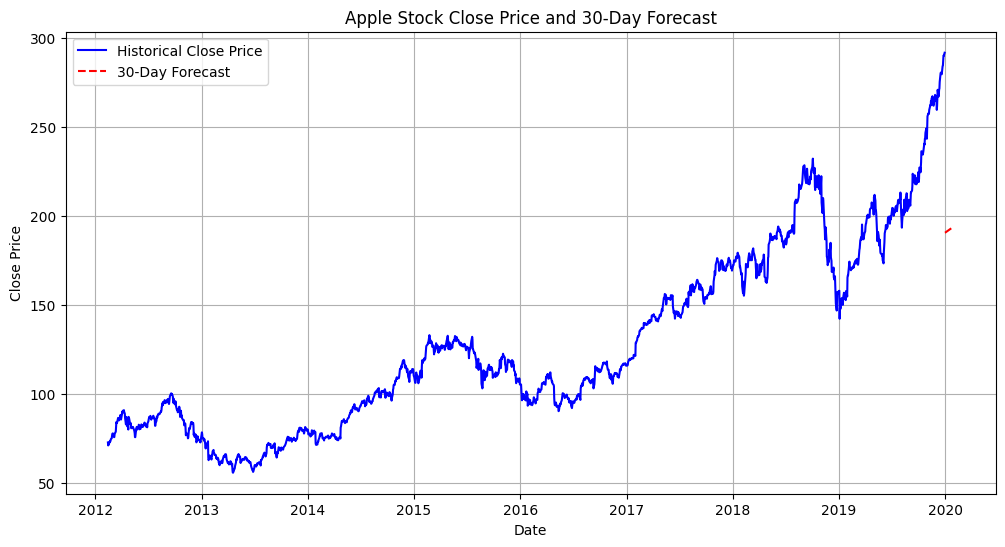

In [ ]:
# Plot the historical Close Price and the 30-day forecast

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Historical Close Price', color='blue')

# Plot the 30-day forecastf
last_date = df['Date'].iloc[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Ensure the length of forecast_dates matches the length of predictions_original_scale
if len(forecast_dates) > len(predictions_original_scale):
    forecast_dates = forecast_dates[:len(predictions_original_scale)]
elif len(forecast_dates) < len(predictions_original_scale):
     predictions_original_scale = predictions_original_scale[:len(forecast_dates)]


plt.plot(forecast_dates, predictions_original_scale, label='30-Day Forecast', color='red', linestyle='--')

plt.title('Apple Stock Close Price and 30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#  ARIMA model predicting a gradual increase in the Apple stock's closing price in the short term.

In [ ]:
# Fit the SARIMA model

from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define the SARIMA order (p, d, q) and seasonal order (P, D, Q, S)
p = 1
d = 1
q = 1

# Define the seasonal order (P, D, Q, S)
P = 0 # Setting seasonal AR order to 0
D = 0 # Setting seasonal differencing order to 0
Q = 0 # Setting seasonal MA order to 0
S = 7 # (weekly)


sarima_model = SARIMAX(df['Close_log'].iloc[0:len(train_data)],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, S),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_model_fit = sarima_model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
#Evalution matrics of SARIMA model

# Let's re-fit the SARIMA model on the full log training data for forecasting the test set
sarima_model_full_train = SARIMAX(df['Close_log'].iloc[0:train_size].dropna(),
                                  order=(p, d, q),
                                  seasonal_order=(P, D, Q, S),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

sarima_model_full_train_fit = sarima_model_full_train.fit()
sarima_predictions_log_test = sarima_model_full_train_fit.predict(start=train_size, end=len(df['Close_log']) - 1)


# Inverse transform the SARIMA test predictions
sarima_predictions_original_scale_test = np.expm1(sarima_predictions_log_test)

# Get the actual test data from the original dataframe for comparison
actual_test_data_sarima = df['Close'].iloc[train_size:]


# Ensure both series have the same index for evaluation
sarima_predictions_original_scale_test.index = actual_test_data_sarima.index


# Evaluate the model
mse_sarima = mean_squared_error(actual_test_data_sarima, sarima_predictions_original_scale_test)
rmse_sarima = np.sqrt(mse_sarima)
mae_sarima = mean_absolute_error(actual_test_data_sarima, sarima_predictions_original_scale_test)

print(f"SARIMA Model Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {mse_sarima:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sarima:.4f}")
print(f"Mean Absolute Error (MAE): {mae_sarima:.4f}")

SARIMA Model Evaluation on Test Data:
Mean Squared Error (MSE): 1116.4471
Root Mean Squared Error (RMSE): 33.4133
Mean Absolute Error (MAE): 24.9803


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# Make predictions using the SARIMA model

# Make predictions on log  for the next 30 days (forecast)
sarima_predictions_log = sarima_model_fit.predict(start=len(df['Close_log']), end=len(df['Close_log']) + 30 - 1)

# Inverse transform the SARIMA predictions to the original scale

# Inverse the log transformation
sarima_predictions_original_scale = np.expm1(sarima_predictions_log)

print("\nSARIMA Predictions on original price scale:")
print(sarima_predictions_original_scale.head())
print(sarima_predictions_original_scale.tail())


SARIMA Predictions on original price scale:
1982    190.34079
1983    190.34079
1984    190.34079
1985    190.34079
1986    190.34079
Name: predicted_mean, dtype: float64
2007    190.34079
2008    190.34079
2009    190.34079
2010    190.34079
2011    190.34079
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


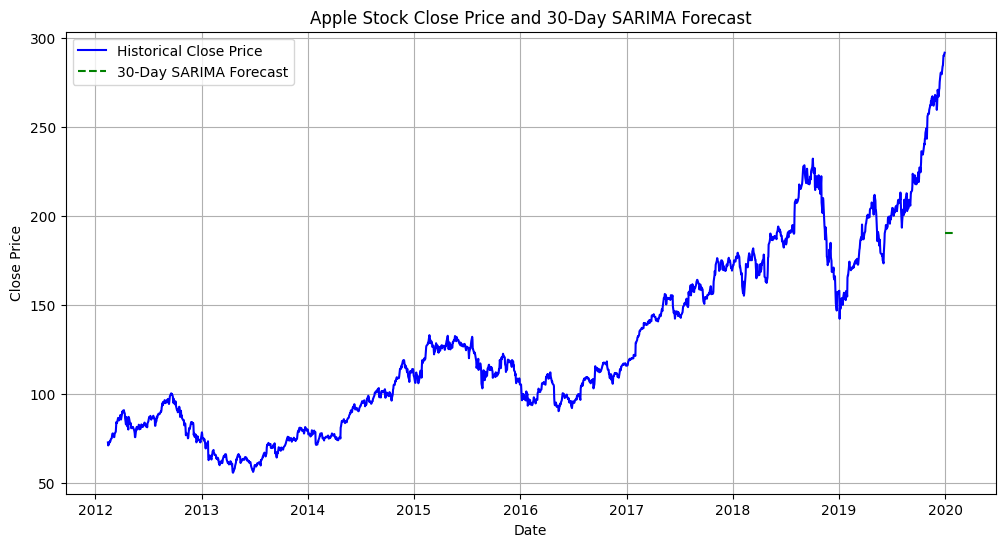

In [ ]:
# Visualize the historical Close Price and the 30-day SARIMA forecast

plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Close'], label='Historical Close Price', color='blue')

# Plot the 30-day SARIMA forecast
last_date = df['Date'].iloc[-1]
forecast_dates_sarima = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Ensure the length of forecast_dates_sarima matches the length of sarima_predictions_original_scale
if len(forecast_dates_sarima) > len(sarima_predictions_original_scale):
    forecast_dates_sarima = forecast_dates_sarima[:len(sarima_predictions_original_scale)]
elif len(forecast_dates_sarima) < len(sarima_predictions_original_scale):
     sarima_predictions_original_scale = sarima_predictions_original_scale[:len(forecast_dates_sarima)]

plt.plot(forecast_dates_sarima, sarima_predictions_original_scale, label='30-Day SARIMA Forecast', color='green', linestyle='--')

plt.title('Apple Stock Close Price and 30-Day SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# SARIMA model is predicting a period of relative stability in the stock price in the immediate future.

In [ ]:
# Fit the Holt-Winters Exponential Smoothing model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data_es = df['Close'].iloc[:train_size]
test_data_es = df['Close'].iloc[train_size:]

es_model = ExponentialSmoothing(train_data_es, seasonal_periods=7, trend='add', seasonal='add')

# Fit the model
es_model_fit = es_model.fit()



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
# Evalution matrics for Exponential Smoothing Model


# Let's re-fit the ES model on the full training data for forecasting the test set
es_model_full_train = ExponentialSmoothing(train_data_es.dropna(), seasonal_periods=7, trend='add', seasonal='add')
es_model_full_train_fit = es_model_full_train.fit()

future_forecast_es_test = es_model_full_train_fit.forecast(steps=len(test_data_es.dropna()))

actual_test_data_es = test_data_es.dropna()

# Ensure both series have the same index for evaluation
future_forecast_es_test.index = actual_test_data_es.index


# Evaluate the model
mse_es = mean_squared_error(actual_test_data_es, future_forecast_es_test)
rmse_es = np.sqrt(mse_es)
mae_es = mean_absolute_error(actual_test_data_es, future_forecast_es_test)

print(f"Exponential Smoothing Model Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {mse_es:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_es:.4f}")
print(f"Mean Absolute Error (MAE): {mae_es:.4f}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Exponential Smoothing Model Evaluation on Test Data:
Mean Squared Error (MSE): 715.9409
Root Mean Squared Error (RMSE): 26.7571
Mean Absolute Error (MAE): 21.1345


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Exponential Smoothing Forecast for the next 30 future days:
1585    190.424847
1586    190.563376
1587    190.557705
1588    190.532109
1589    190.585819
dtype: float64
1610    192.142713
1611    192.221101
1612    192.315864
1613    192.500706
1614    192.639235
dtype: float64


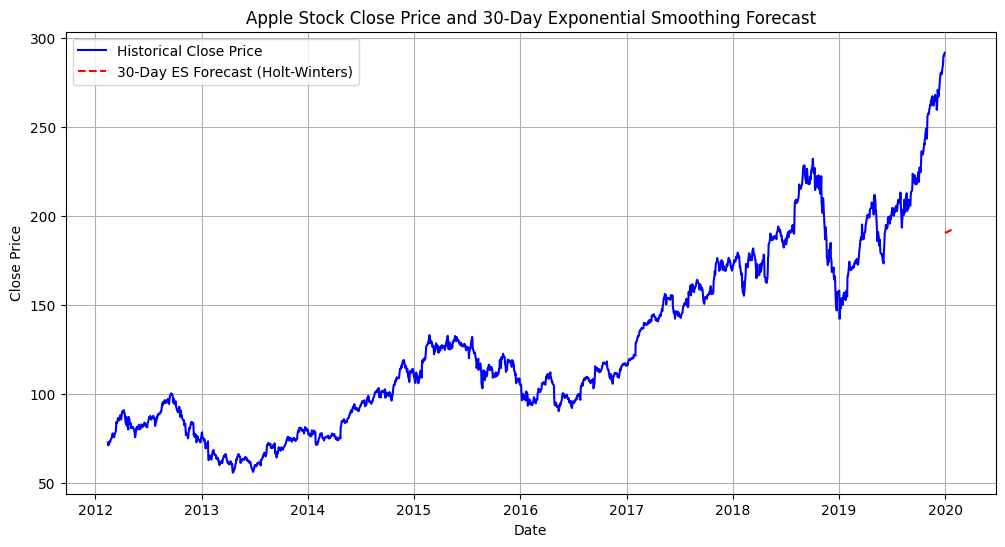

In [ ]:
# Make predictions for the next 30 future days
future_forecast_es = es_model_fit.forecast(steps=30)

print("\nExponential Smoothing Forecast for the next 30 future days:")
print(future_forecast_es.head())
print (future_forecast_es.tail())

# Visualize the historical Close Price and the 30-day Exponential Smoothing forecast
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Close'], label='Historical Close Price', color='blue')

# Create dates for the future forecast
last_historical_date = df['Date'].iloc[-1]
forecast_dates_es = pd.date_range(start=last_historical_date + pd.Timedelta(days=1), periods=30, freq='D')

plt.plot(forecast_dates_es, future_forecast_es, label='30-Day ES Forecast (Holt-Winters)', color='red', linestyle='--')

plt.title('Apple Stock Close Price and 30-Day Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# now using machin learing model (XG Boost model)

In [ ]:
# Define the target variable
target = 'Close'

# Define the input features - using the 'Date' column for time-based forecasting
features = ['Date']

print("Features:", features)
print("Target:", target)

Features: ['Date']
Target: Close


In [ ]:
# Split data into training and testing sets based on time
train_size = int(len(df) * 0.8) # Using 80% of the data for training

X = df[features]
y = df[target]

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


print("Training data shape (features):", X_train.shape)
print("Testing data shape (features):", X_test.shape)
print("Training data shape (target):", y_train.shape)
print("Testing data shape (target):", y_test.shape)

Training data shape (features): (1585, 1)
Testing data shape (features): (397, 1)
Training data shape (target): (1585,)
Testing data shape (target): (397,)


In [ ]:
#Normalized the colume
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform both training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of scaled training features:", X_train_scaled.shape)
print("Shape of scaled testing features:", X_test_scaled.shape)

Shape of scaled training features: (1585, 1)
Shape of scaled testing features: (397, 1)


In [ ]:
# Fit the model with xgb
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # Objective function for regression
                             n_estimators=1000,          # Number of boosting rounds
                             learning_rate=0.05,         # Step size shrinkage
                             max_depth=7,                # Maximum depth of a tree
                             gamma=0,                    # Minimum loss reduction required to make a further partition
                             reg_alpha=0.005,            # L1 regularization term
                             random_state=42)            # Random number seed

# Fit the model to the scaled training data
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#Evalution matric of XGB model
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_test_actual = y_test

# Evaluate the model using metrics
mse_xgb = mean_squared_error(y_test_actual, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test_actual, y_pred_xgb)

print(f"XGBoost Model Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")

XGBoost Model Evaluation on Test Data:
Mean Squared Error (MSE): 1186.3965
Root Mean Squared Error (RMSE): 34.4441
Mean Absolute Error (MAE): 25.8970


In [ ]:
#Make prediction for the next 30 days by using Trained XGB Model

# Create a date range for the next 30 days starting from the day after the last historical date
last_historical_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_historical_date + pd.Timedelta(days=1), periods=30, freq='D')

last_known_features = df[features].iloc[-1]

# Create a DataFrame for future features with the future dates as index
future_features_df = pd.DataFrame([last_known_features] * len(future_dates), index=future_dates, columns=features)

future_features_scaled = scaler.transform(future_features_df)

future_predictions = xgb_model.predict(future_features_scaled)

future_predictions_series = pd.Series(future_predictions, index=future_dates)

print("\nXGBoost Predictions for the next 30 future days:")
print(future_predictions_series.head())
print(future_predictions_series.tail())




XGBoost Predictions for the next 30 future days:
2019-12-31    188.093262
2020-01-01    188.093262
2020-01-02    188.093262
2020-01-03    188.093262
2020-01-04    188.093262
Freq: D, dtype: float32
2020-01-25    188.093262
2020-01-26    188.093262
2020-01-27    188.093262
2020-01-28    188.093262
2020-01-29    188.093262
Freq: D, dtype: float32


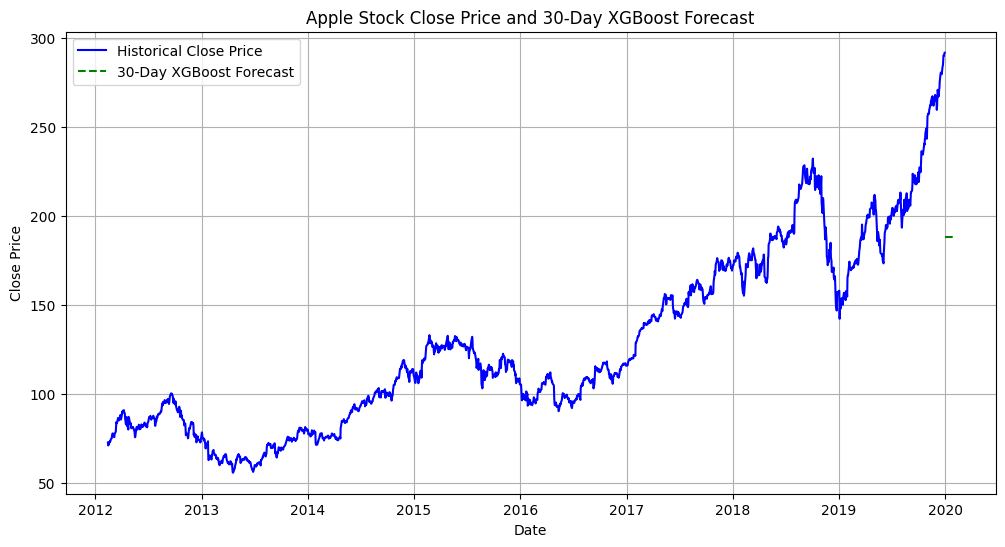

In [ ]:
# Visualize the historical Close Price and the 30-day future forecast
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Close'], label='Historical Close Price', color='blue')
plt.plot(future_predictions_series.index, future_predictions_series.values, label='30-Day XGBoost Forecast', color='green', linestyle='--')

plt.title('Apple Stock Close Price and 30-Day XGBoost Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

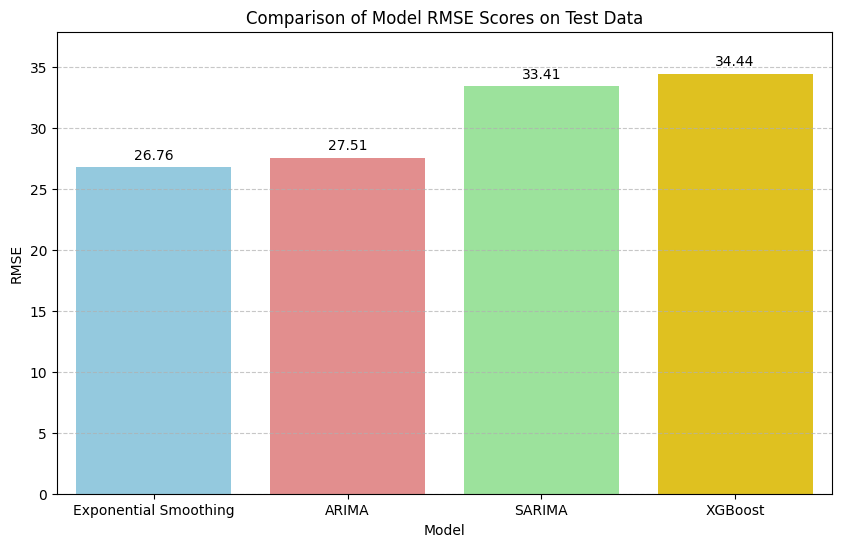

In [ ]:
#Visulization of RMSE of All model

model_rmse = {
    'ARIMA': rmse_arima,
    'SARIMA': rmse_sarima,
    'XGBoost': rmse_xgb,
    'Exponential Smoothing': rmse_es
}

sorted_model_rmse = dict(sorted(model_rmse.items(), key=lambda item: item[1]))
models = list(sorted_model_rmse.keys())
rmse_values = list(sorted_model_rmse.values())
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_values, palette=colors)
plt.title('Comparison of Model RMSE Scores on Test Data')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) * 1.1) # Set y-axis limit slightly above the max RMSE

# Add the RMSE values on top of the bars
for i, value in enumerate(rmse_values):
    plt.text(i, value + (max(rmse_values) * 0.02), f'{value:.2f}', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Here performance on historical test data  evaluation metrics  of Exponential Smoothing model performed the best among the models trained
# so for predicting fututre prices as well  , we have to look which model prform on unseen data , so it'sExponential Smoothing model

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Load the trained ARIMA model
try:
    loaded_arima_model = joblib.load('arima_model.joblib')
    st.success("ARIMA model loaded successfully!")
except Exception as e:
    st.error(f"Error loading the ARIMA model: {e}")
    loaded_arima_model = None

st.title('Stock Price Forecasting with ARIMA')

if loaded_arima_model:
    st.write("This app forecasts future stock prices using a trained ARIMA model.")

    # Get the number of future days to forecast from the user
    num_days = st.slider('Select the number of future days to forecast:', 1, 60, 30)

    if st.button('Generate Forecast'):
        try:
            # To make predictions, we need the last observed value of the log-transformed series
            # In a real deployment, you would need to save this value from your training data
            # and load it here. For this example, we'll use a placeholder.
            # **IMPORTANT:** Replace this with the actual last log price from your training data
            # when you deploy this app.
            # You can get this value from your training data before saving the model.
            # Example: last_train_log_price = df['Close_log'].iloc[train_size - 1]
            last_log_price_placeholder = 5.253529209903061 # Replace with your actual value

            # Make predictions on differenced log transformed close price for the next num_days
            predictions_diff_log = loaded_arima_model.forecast(steps=num_days)

            # Inverse transform the predictions to the original scale
            predictions_log = np.cumsum(predictions_diff_log) + last_log_price_placeholder
            predictions_original_scale = np.expm1(predictions_log)

            # Create a date range for the future forecast
            # In a real deployment, you would need to know the date of the last data point
            # used for training. Save this date when you save the model.
            # **IMPORTANT:** Replace this with the actual last date from your training data
            # when you deploy this app.
            # Example: last_historical_date = df['Date'].iloc[train_size - 1]
            last_historical_date_placeholder = pd.to_datetime('2018-06-01') # Replace with your actual value
            forecast_dates = pd.date_range(start=last_historical_date_placeholder + pd.Timedelta(days=1), periods=num_days, freq='D')

            # Create a DataFrame for the forecast
            forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted Close Price': predictions_original_scale})
            forecast_df = forecast_df.set_index('Date')

            st.subheader('Forecasted Stock Prices:')
            st.write(forecast_df)

            # Optional: Visualize the forecast (requires matplotlib)
            # You would need to load historical data to plot alongside the forecast
            # import matplotlib.pyplot as plt
            # st.subheader('Historical and Forecasted Prices')
            # # Assuming you have your historical data loaded in a DataFrame named 'historical_df'
            # # fig, ax = plt.subplots(figsize=(12, 6))
            # # ax.plot(historical_df['Date'], historical_df['Close'], label='Historical Close Price', color='blue')
            # # ax.plot(forecast_df.index, forecast_df['Predicted Close Price'], label='Forecast', color='red', linestyle='--')
            # # ax.set_title('Stock Price Forecast')
            # # ax.set_xlabel('Date')
            # # ax.set_ylabel('Close Price')
            # # ax.legend()
            # # st.pyplot(fig)


        except Exception as e:
            st.error(f"Error generating forecast: {e}")
else:
    st.warning("Model not loaded. Please ensure 'arima_model.joblib' exists in the same directory as the app.")

Writing app.py


**Steps to deploy and run the Streamlit app:**

1.  **Save the Streamlit script**: Run the cell above that starts with `%%writefile app.py`. This will create a Python file named `app.py` in your current directory.
2.  **Install Streamlit**: If you haven't already, install Streamlit by running `pip install streamlit` in your terminal or Colab notebook.
3.  **Run the app**: Open your terminal or command prompt, navigate to the directory where you saved `app.py` and `arima_model.joblib`, and run the command: `streamlit run app.py`. If you are in a Colab notebook, you can use the `!` prefix: `!streamlit run app.py`
4.  **Access the app**: Streamlit will start a local web server and provide you with a URL (usually `http://localhost:8501`) to access your application in your web browser.

Remember to replace the placeholder values for the last log price and last historical date in the `app.py` script with your actual values from your training data before deploying.

In [ ]:
import joblib

# Assuming 'arima_model_fit' is your fitted ARIMA model object
# Save the model to a file
joblib.dump(arima_model_fit, 'arima_model.joblib')

print("ARIMA model saved as arima_model.joblib")

ARIMA model saved as arima_model.joblib


In [ ]:
pip install streamlit


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.77.215:8501

